In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from scipy.stats import norm
# df = pd.read_excel('Breast-cancer-mod.xlsx')

In [65]:
np.random.seed(12)

# Connect your Google Drive to your Colab file
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [66]:
# Read CSV file
df = pd.read_excel("gdrive/My Drive/Colab Notebooks/Breast-cancer-mod.xlsx") # need to change to your google drive's xlsx directory
# Checking dataframe dimensionality
print("The dimension of this dataset: ", df.shape, "\n")

# Checking format of dataframe
print(df.head())

The dimension of this dataset:  (592, 32) 

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_wor

In [48]:
df.shape

(592, 33)

In [51]:
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df = df.loc[:, ~df.columns.str.contains('worst')]
# columns_to_keep = [col for col in df.columns if not col.endswith('worst')]
# df = df[columns_to_keep]
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
587,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239
588,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498
589,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892
590,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185


In [52]:
duplicates = df.duplicated()
duplicate_rows = df[duplicates]
print(duplicate_rows)
# 20 duplicated rows

          id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
24    851509         M       21.160         23.04          137.20     1404.0   
31    853201         M       17.570         15.05          115.00      955.1   
45    855625         M       19.070         24.81          128.30     1104.0   
65    858981         B        8.598         20.98           54.66      221.8   
111   863031         B       11.640         18.33           75.17      412.5   
121   864685         B       11.930         21.53           76.53      438.6   
141   867739         M       18.450         21.91          120.20     1075.0   
152   869254         B       10.750         14.97           68.26      355.3   
189   873592         M       27.220         21.87          182.10     2250.0   
212   878796         M       23.290         26.67          158.90     1685.0   
282  8910721         B       14.290         16.82           90.30      632.6   
321    89346         B        9.000     

In [53]:
df = df.drop_duplicates()
df
# 20 rows of duplicates removed

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
587,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239
588,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498
589,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892
590,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185


In [54]:
duplicates_id = df.duplicated(subset=['id'])
duplicate_id_rows = df[duplicates_id]
print(duplicate_id_rows)
# 3 duplicated rows based on id -> 3 similar records that need to be merged

def merge_rows(group):
    merged_row = {}
    for column in group.columns:
        if pd.notna(group[column].iloc[0]):
            merged_row[column] = group[column].iloc[0]
        elif len(group) > 1 and pd.notna(group[column].iloc[1]):
            merged_row[column] = group[column].iloc[1]
        else:
            merged_row[column] = np.nan
    return pd.Series(merged_row)

# Apply the custom function to each group of rows with the same 'id'
df = df.groupby('id', group_keys=False).apply(merge_rows).reset_index(drop=True)
# df = df.drop('id', axis=1)
print(df)


           id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
244  88206102         M          NaN         27.81           134.4     1319.0   
309    891936         B        10.91           NaN             NaN        NaN   
378   9010872         B        16.50         18.29             NaN      838.1   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
244          0.09159           0.10740         0.15540                  NaN   
309          0.08518           0.04721         0.01236              0.01369   
378          0.09686           0.08468             NaN              0.04835   

     ...  radius_se  texture_se  perimeter_se  area_se  smoothness_se  \
244  ...     0.5240       1.189         3.767    70.01       0.005020   
309  ...     0.1753       1.027         1.267    11.09       0.003478   
378  ...     0.3389       1.439         2.344    33.58       0.007257   

     compactness_se  concavity_se  concave points_se  symmetry_se

In [55]:
missing_data_summary = pd.DataFrame({
    'Variable': df.columns,
    'Missing Values': df.isnull().sum(),
    'Percentage Missing': (df.isnull().sum() / len(df)) * 100
})

# Sort the summary by the percentage of missing values in descending order
missing_data_summary = missing_data_summary.sort_values(by='Percentage Missing', ascending=False)

# Print the summary
print("Missing Data Summary:")
print(missing_data_summary)

Missing Data Summary:
                                      Variable  Missing Values  \
fractal_dimension_mean  fractal_dimension_mean               1   
radius_mean                        radius_mean               1   
perimeter_mean                  perimeter_mean               1   
area_mean                            area_mean               1   
smoothness_mean                smoothness_mean               1   
compactness_mean              compactness_mean               1   
concave points_mean        concave points_mean               1   
symmetry_mean                    symmetry_mean               1   
area_se                                area_se               0   
symmetry_se                        symmetry_se               0   
concave points_se            concave points_se               0   
concavity_se                      concavity_se               0   
compactness_se                  compactness_se               0   
smoothness_se                    smoothness_se        

In [56]:
# Calculate the mean for numeric columns only
numeric_mean = df.select_dtypes(include=np.number).mean()

# Fill NaN values with the mean for each numeric column
df.fillna(numeric_mean, inplace=True)
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se
0,8670,M,15.46,19.48,101.70,748.9,0.10920,0.12230,0.14660,0.08087,...,0.4743,0.7859,3.0940,48.31,0.006240,0.01484,0.02813,0.010930,0.01397,0.002461
1,8913,B,12.89,13.12,81.89,515.9,0.06955,0.03729,0.02260,0.01171,...,0.1532,0.4690,1.1150,12.68,0.004731,0.01345,0.01652,0.005905,0.01619,0.002081
2,8915,B,14.96,19.10,97.03,687.3,0.08992,0.09823,0.05940,0.04819,...,0.2877,0.9480,2.1710,24.87,0.005332,0.02115,0.01536,0.011870,0.01522,0.002815
3,9047,B,12.94,16.17,83.18,507.6,0.09879,0.08836,0.03296,0.02390,...,0.1458,0.9050,0.9975,11.36,0.002887,0.01285,0.01613,0.007308,0.01870,0.001972
4,85715,M,13.17,18.66,85.98,534.6,0.11580,0.12310,0.12260,0.07340,...,0.2871,0.8937,1.8970,24.25,0.006532,0.02336,0.02905,0.012150,0.01743,0.003643
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,911157302,M,21.10,20.52,138.10,1384.0,0.09684,0.11750,0.15720,0.11550,...,0.6643,1.3610,4.5420,81.89,0.005467,0.02075,0.03185,0.014660,0.01029,0.002205
565,911296201,M,17.08,27.15,111.20,930.9,0.09898,0.11100,0.10070,0.06431,...,0.9291,1.1520,6.0510,115.20,0.008740,0.02219,0.02721,0.014580,0.02045,0.004417
566,911296202,M,27.42,26.27,186.90,2501.0,0.10840,0.19880,0.36350,0.16890,...,2.5470,1.3060,18.6500,542.20,0.007650,0.05374,0.08055,0.025980,0.01697,0.004558
567,911320501,B,11.60,18.36,73.88,412.7,0.08508,0.05855,0.03367,0.01777,...,0.1816,0.7656,1.3030,12.89,0.006709,0.01701,0.02080,0.007497,0.02124,0.002768


In [57]:
column_data_types = df.dtypes

In [58]:
numerical_columns = column_data_types[column_data_types != 'object'].index.tolist()
categorical_columns = column_data_types[column_data_types == 'object'].index.tolist()

print("Numerical Columns:", numerical_columns)
print("Categorical Columns:", categorical_columns)

Numerical Columns: ['id', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se']
Categorical Columns: ['diagnosis']


# Codes for frequency/density and normal distribution chart

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      569 non-null    int64  
 1   diagnosis               569 non-null    object 
 2   radius_mean             569 non-null    float64
 3   texture_mean            569 non-null    float64
 4   perimeter_mean          569 non-null    float64
 5   area_mean               569 non-null    float64
 6   smoothness_mean         569 non-null    float64
 7   compactness_mean        569 non-null    float64
 8   concavity_mean          569 non-null    float64
 9   concave points_mean     569 non-null    float64
 10  symmetry_mean           569 non-null    float64
 11  fractal_dimension_mean  569 non-null    float64
 12  radius_se               569 non-null    float64
 13  texture_se              569 non-null    float64
 14  perimeter_se            569 non-null    fl

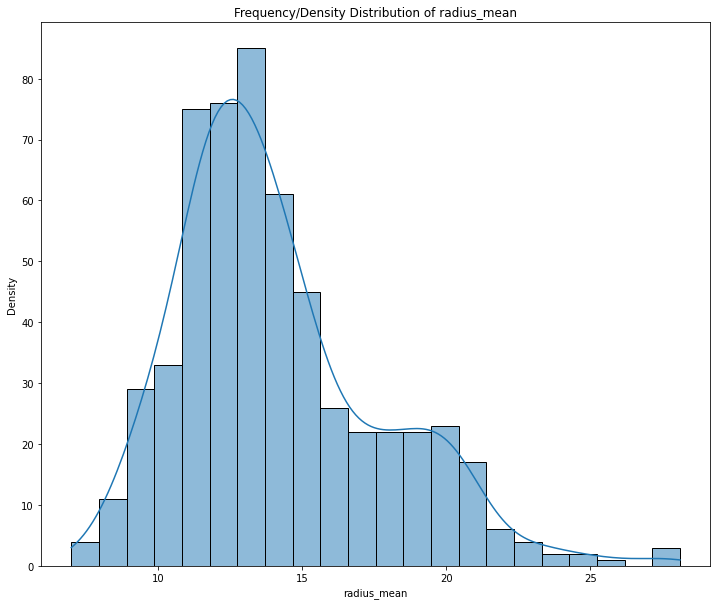


--- Central Tendency ---
Mean: 14.12927640845071
Median: 13.38
Mode: 12.34
--- Variation ---
Variance: 12.416678890147667
Standard Deviation: 3.523730819763006
--- Shape ---
Kurtosis: 0.8447602125901423
Skewness: 0.9409969345751014


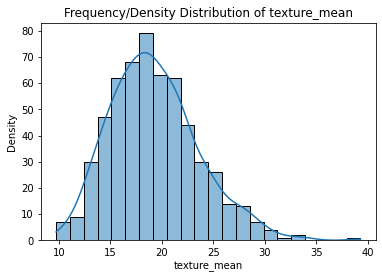


--- Central Tendency ---
Mean: 19.289648506151128
Median: 18.84
Mode: 14.93
--- Variation ---
Variance: 18.498908679051468
Standard Deviation: 4.30103576816695
--- Shape ---
Kurtosis: 0.7583189723727757
Skewness: 0.6504495420828157


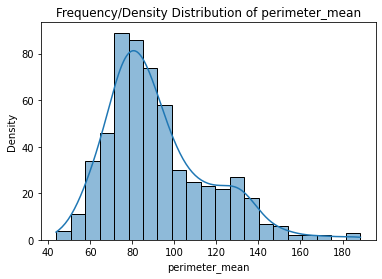


--- Central Tendency ---
Mean: 91.95945422535206
Median: 86.24
Mode: 82.61
--- Variation ---
Variance: 590.3882678359331
Standard Deviation: 24.29790665542884
--- Shape ---
Kurtosis: 0.9744888636623252
Skewness: 0.9919488910424449


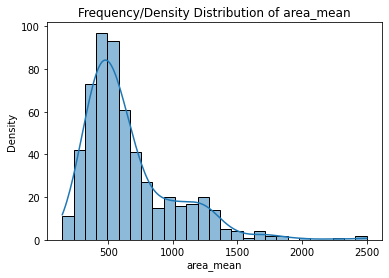


--- Central Tendency ---
Mean: 654.8117957746481
Median: 551.1
Mode: 512.2
--- Variation ---
Variance: 123840.15368128225
Standard Deviation: 351.9092975203728
--- Shape ---
Kurtosis: 3.6541252692777855
Skewness: 1.6464578998401347


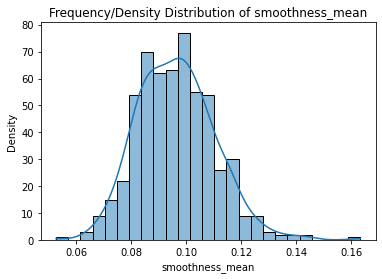


--- Central Tendency ---
Mean: 0.09634454225352107
Median: 0.09587
Mode: 0.1007
--- Variation ---
Variance: 0.00019765875084680617
Standard Deviation: 0.014059116289682157
--- Shape ---
Kurtosis: 0.8632736494142232
Skewness: 0.4597280190577646


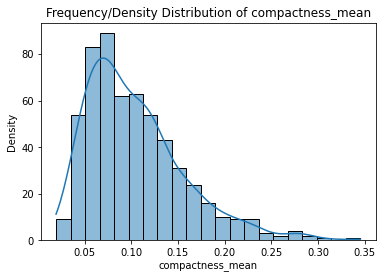


--- Central Tendency ---
Mean: 0.10414686619718311
Median: 0.09263
Mode: 0.1147
--- Variation ---
Variance: 0.002767746460601812
Standard Deviation: 0.05260937616624828
--- Shape ---
Kurtosis: 1.706112028337813
Skewness: 1.1988233451242882


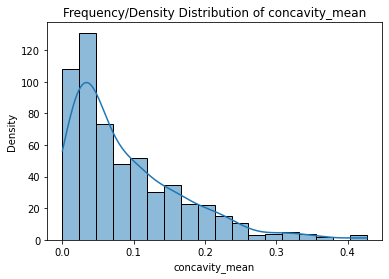


--- Central Tendency ---
Mean: 0.08879931581722315
Median: 0.06154
Mode: 0.0
--- Variation ---
Variance: 0.006355247900423131
Standard Deviation: 0.07971980870789348
--- Shape ---
Kurtosis: 1.9986375291042133
Skewness: 1.401179738948672


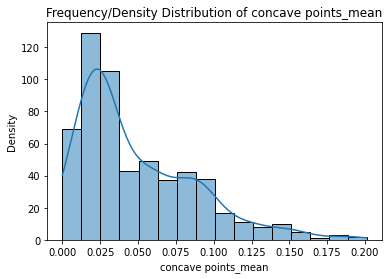


--- Central Tendency ---
Mean: 0.048953211267605615
Median: 0.0337
Mode: 0.0
--- Variation ---
Variance: 0.0015050004723638176
Standard Deviation: 0.038794335570593516
--- Shape ---
Kurtosis: 1.0658870636928057
Skewness: 1.1695265334230445


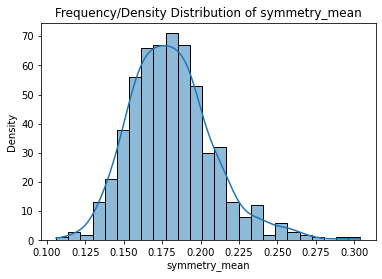


--- Central Tendency ---
Mean: 0.1811059859154931
Median: 0.1792
Mode: 0.1601
--- Variation ---
Variance: 0.0007497662669857166
Standard Deviation: 0.027381860181253513
--- Shape ---
Kurtosis: 1.3111299183794882
Skewness: 0.7315817574898337


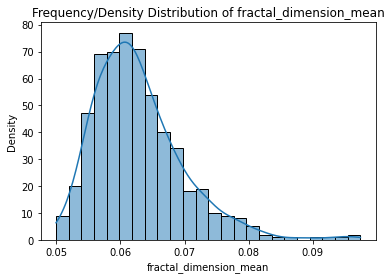


--- Central Tendency ---
Mean: 0.06280640845070422
Median: 0.06155
Mode: 0.05667
--- Variation ---
Variance: 4.98046733683793e-05
Standard Deviation: 0.007057242617933671
--- Shape ---
Kurtosis: 3.009547393336942
Skewness: 1.3030938004308703


In [60]:
mean_columns = [
    'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
    'smoothness_mean', 'compactness_mean', 'concavity_mean',
    'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean'
]

# Plot frequency/density distribution
plt.figure(figsize=(12, 10))
for i, column in enumerate(mean_columns, start=1):
    sns.histplot(data=df, x=column, kde=True)
    plt.xlabel(column)
    plt.ylabel('Density')
    plt.title(f'Frequency/Density Distribution of {column}')
    plt.show()
# Calculate descriptive statistics
    mean = df[column].mean()
    median = df[column].median()
    mode = df[column].mode().iloc[0]
    variance = df[column].var()
    std_deviation = df[column].std()
    skewness = df[column].skew()
    kurtosis = df[column].kurtosis()
# Print descriptive statistics
    print("\n--- Central Tendency ---")
    print("Mean:", mean)
    print("Median:", median)
    print("Mode:", mode)
    print("--- Variation ---")
    print("Variance:", variance)
    print("Standard Deviation:", std_deviation)
    print("--- Shape ---")
    print("Kurtosis:", kurtosis)
    print("Skewness:", skewness)

# CODES FOR BOXPLOT

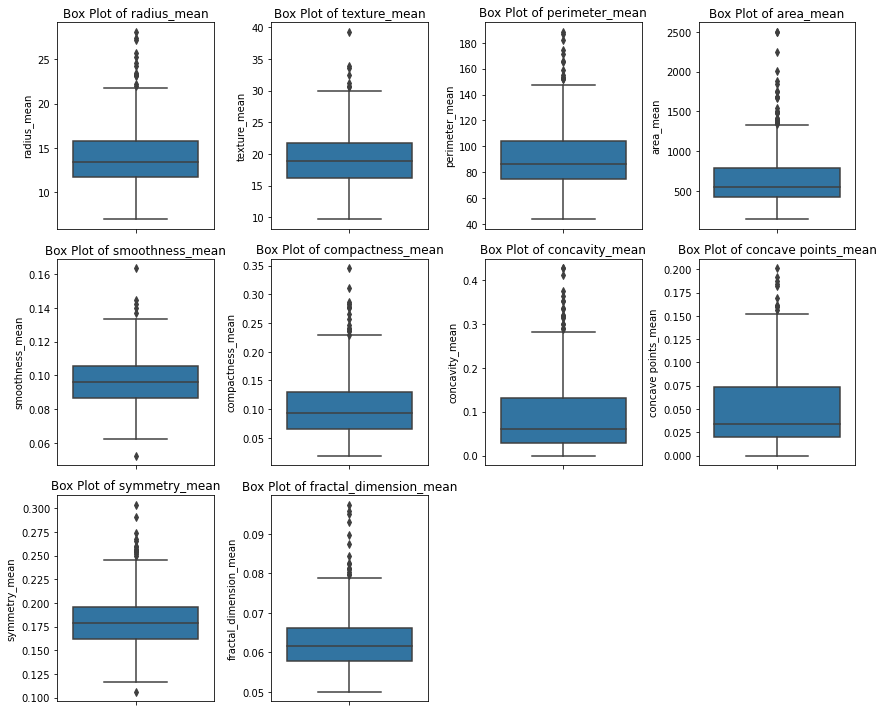

In [61]:
mean_columns = [
    'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
    'smoothness_mean', 'compactness_mean', 'concavity_mean',
    'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean'
]

# Create a grid of box plots
plt.figure(figsize=(12, 10))
for i, column in enumerate(mean_columns, start=1):
    plt.subplot(3, 4, i)  # 4 rows, 3 columns grid
    sns.boxplot(data=df, y=column)
    plt.title(f'Box Plot of {column}')
    plt.ylabel(column)
    plt.xlabel('')

plt.tight_layout()
plt.show()


In [62]:
outliers = {}
for column in mean_columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    potential_outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    outliers[column] = potential_outliers


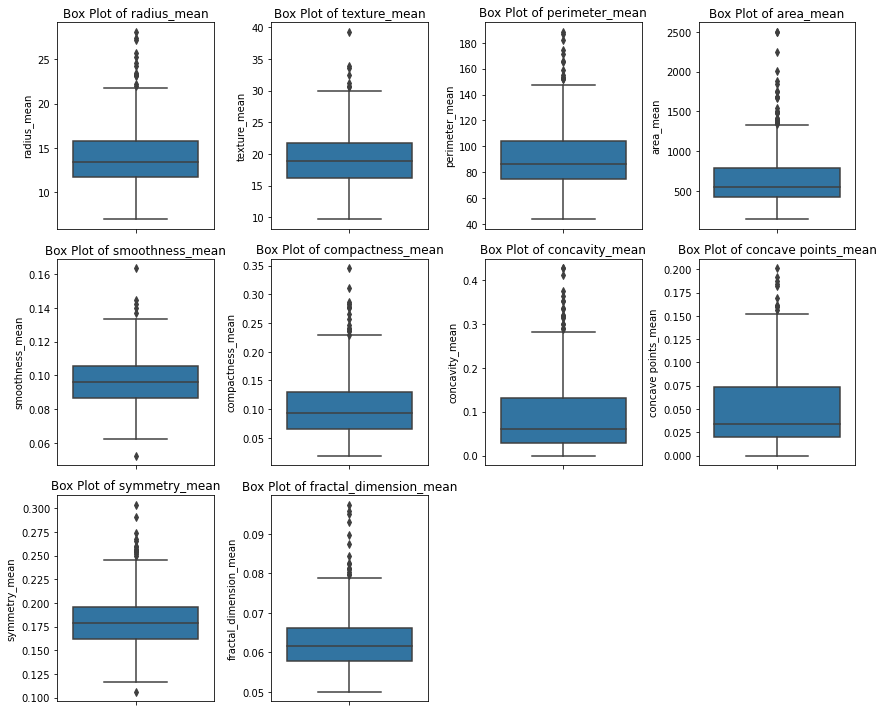

In [63]:
# boxplots after cleaning
plt.figure(figsize=(12, 10))
for i, column in enumerate(mean_columns, start=1):
    plt.subplot(3, 4, i)  # 4 rows, 3 columns grid
    sns.boxplot(data=df, y=column)
    plt.title(f'Box Plot of {column}')
    plt.ylabel(column)
    plt.xlabel('')

plt.tight_layout()
plt.show()

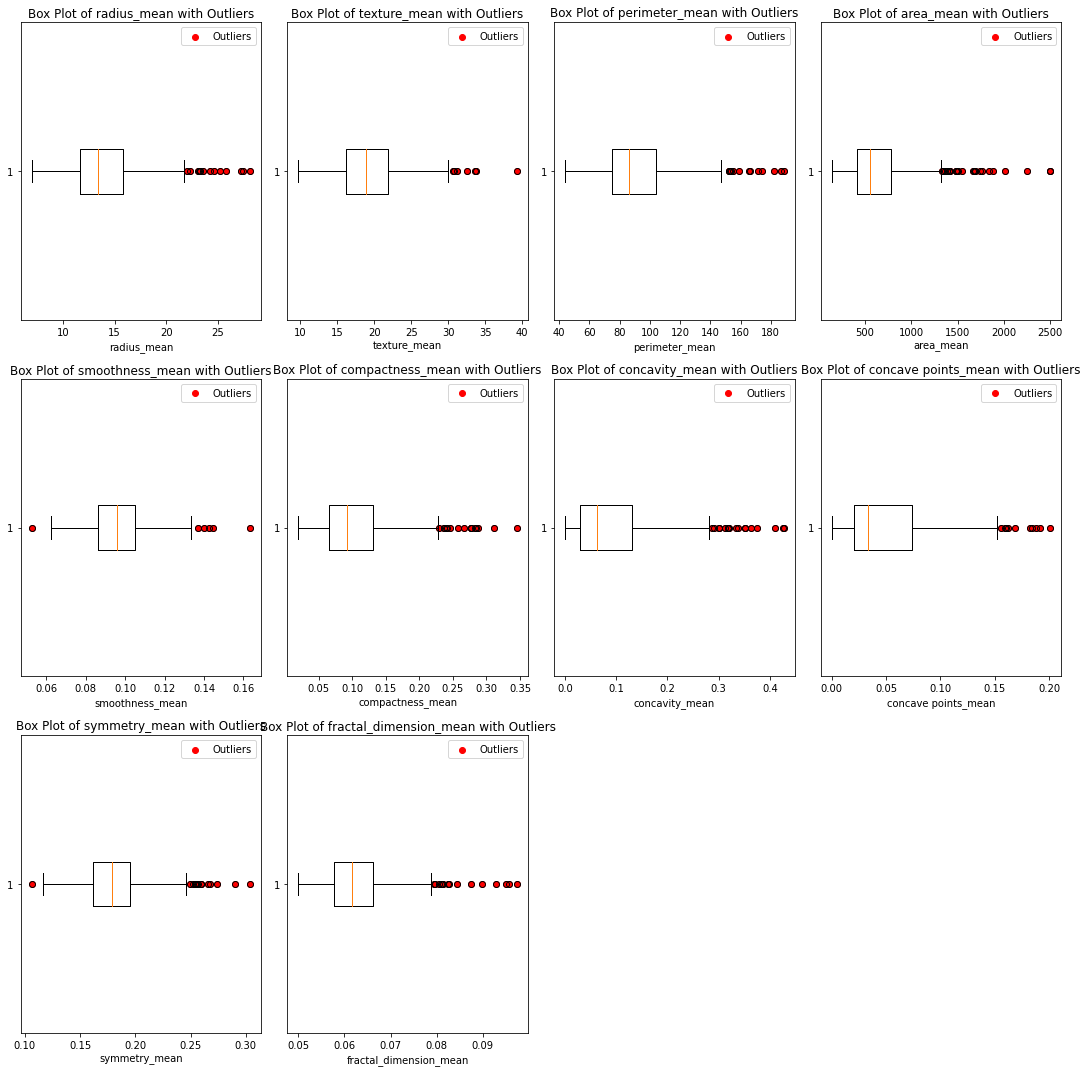

In [64]:
num_rows = (len(outliers) + 3) // 4  # 3 columns

plt.figure(figsize=(15, 5 * num_rows))

for i, (column, potential_outliers) in enumerate(outliers.items(), start=1):
    plt.subplot(num_rows, 4, i)
    plt.boxplot(df[column], vert=False)
    plt.scatter(potential_outliers[column], [1] * len(potential_outliers), color='red', label='Outliers', marker='o')
    plt.title(f'Box Plot of {column} with Outliers')
    plt.xlabel(column)
    plt.legend()

plt.tight_layout()
plt.show()

In [65]:
# casting outliers to mean of col
for column in mean_columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliersBoolean = (df[column] < lower_bound) | (df[column] > upper_bound)

    df.loc[outliersBoolean, column] = df[column].mean()

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      569 non-null    int64  
 1   diagnosis               569 non-null    object 
 2   radius_mean             569 non-null    float64
 3   texture_mean            569 non-null    float64
 4   perimeter_mean          569 non-null    float64
 5   area_mean               569 non-null    float64
 6   smoothness_mean         569 non-null    float64
 7   compactness_mean        569 non-null    float64
 8   concavity_mean          569 non-null    float64
 9   concave points_mean     569 non-null    float64
 10  symmetry_mean           569 non-null    float64
 11  fractal_dimension_mean  569 non-null    float64
 12  radius_se               569 non-null    float64
 13  texture_se              569 non-null    float64
 14  perimeter_se            569 non-null    fl

# CODES FOR SCATTER

In [67]:
mean_columns = [col for col in df.columns if 'mean' in col]
se_columns = [col for col in df.columns if 'se' in col]

#sort to ensure that the same variables are paired eg. radius_mean && radius_se
mean_columns.sort()
se_columns.sort()

print(mean_columns, '\n')
print(se_columns)



['area_mean', 'compactness_mean', 'concave points_mean', 'concavity_mean', 'fractal_dimension_mean', 'perimeter_mean', 'radius_mean', 'smoothness_mean', 'symmetry_mean', 'texture_mean'] 

['area_se', 'compactness_se', 'concave points_se', 'concavity_se', 'fractal_dimension_se', 'perimeter_se', 'radius_se', 'smoothness_se', 'symmetry_se', 'texture_se']


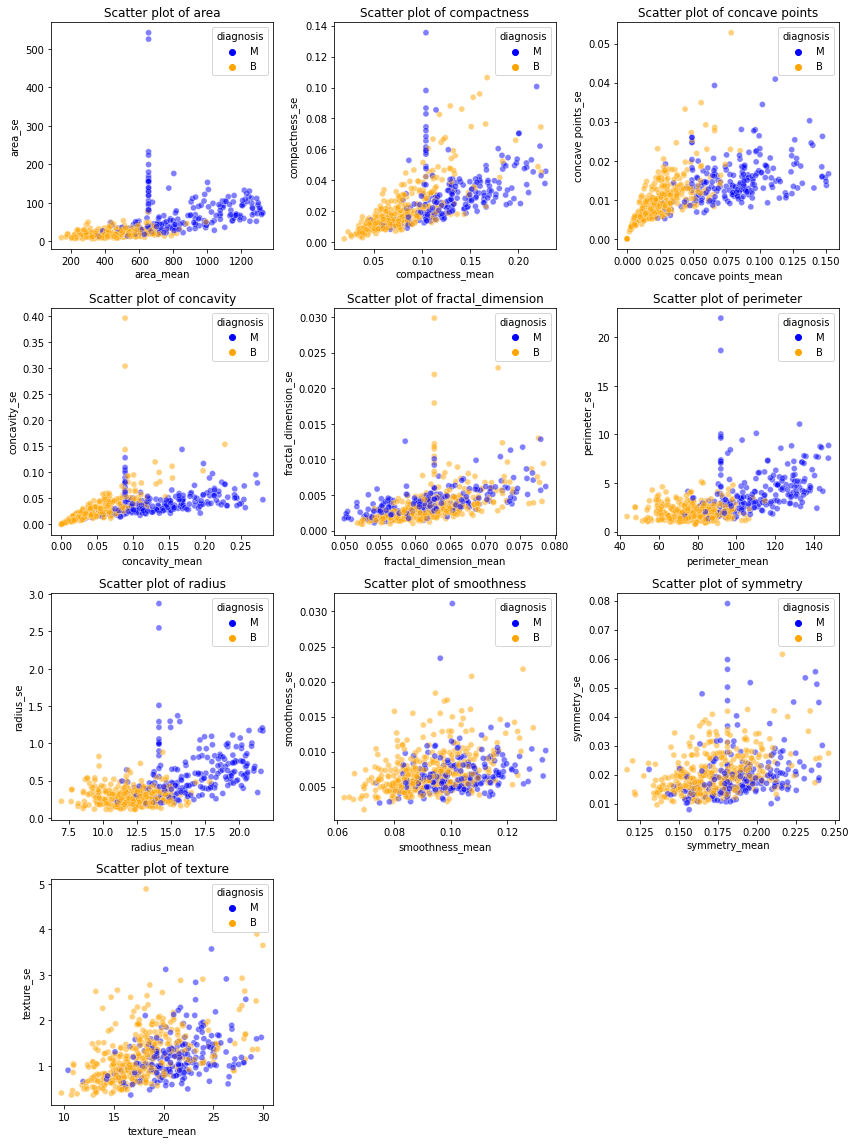

In [68]:
num_rows = (len(mean_columns) + 2) // 3  # 3 columns

plt.figure(figsize=(12, 4 * num_rows))

for i in range(len(mean_columns)):
    plt.subplot(num_rows, 3, i+ 1)
    sns.scatterplot(
        data=df,
        x=mean_columns[i],
        y=se_columns[i],
        hue='diagnosis',
        palette={'M': 'blue', 'B': 'orange'},
        alpha=0.5
    )
    plt.title(f'Scatter plot of {mean_columns[i][:-5]}')
    plt.xlabel(f'{mean_columns[i]}')
    plt.ylabel(se_columns[i])

plt.tight_layout()
plt.show()

the seperation of the orange and blue dots in fields such as radius or concavity suggest that this field may be a good predictor of whether the individual's growth is benign or malignamt

# CODES FOR NORMAL DISTRIBUTION CURVES

In [69]:
malignant_data = df[df['diagnosis'] == 'M']
benign_data = df[df['diagnosis'] == 'B']

print(malignant_data)
print(benign_data)

            id diagnosis  radius_mean  texture_mean  perimeter_mean  \
0         8670         M    15.460000         19.48      101.700000   
4        85715         M    13.170000         18.66       85.980000   
5        86208         M    20.260000         23.03      132.400000   
7        86355         M    14.129276         19.67       91.959454   
10       86517         M    18.660000         17.12      121.400000   
..         ...       ...          ...           ...             ...   
560  881046502         M    20.580000         22.14      134.700000   
561  881094802         M    17.420000         25.56      114.500000   
564  911157302         M    21.100000         20.52      138.100000   
565  911296201         M    17.080000         27.15      111.200000   
566  911296202         M    14.129276         26.27       91.959454   

       area_mean  smoothness_mean  compactness_mean  concavity_mean  \
0     748.900000          0.10920          0.122300        0.146600   
4    

In [70]:
features = ['radius_mean', 'texture_mean', 'area_mean', 'smoothness_mean', 'concavity_mean', 'compactness_mean']
print(features)

['radius_mean', 'texture_mean', 'area_mean', 'smoothness_mean', 'concavity_mean', 'compactness_mean']


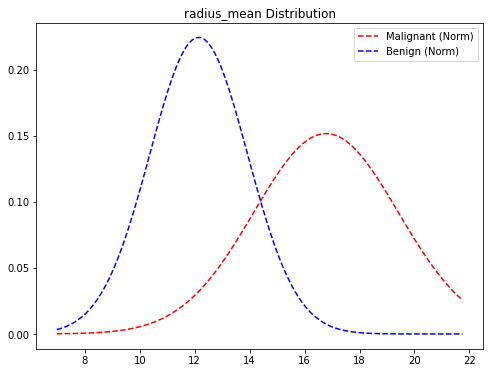

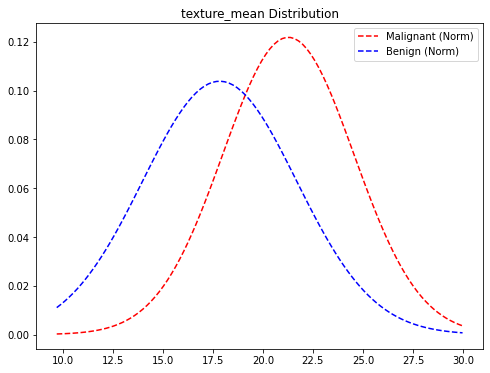

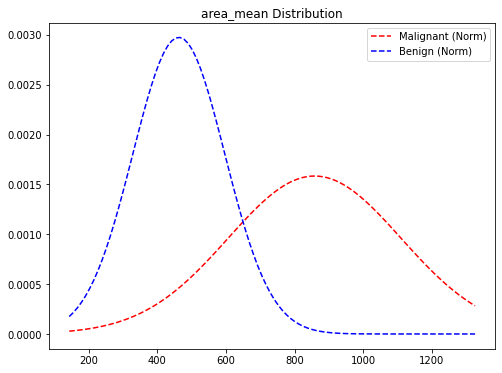

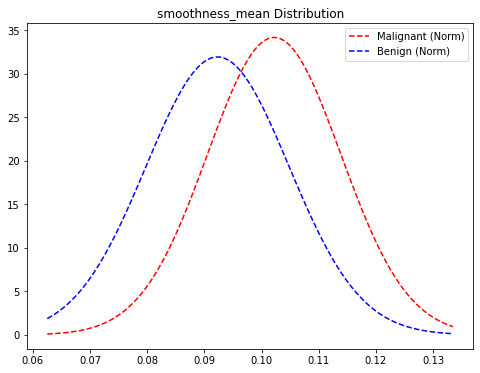

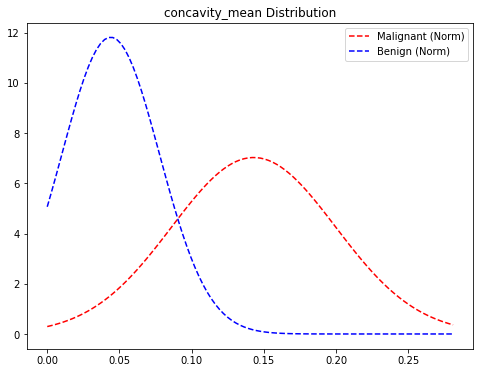

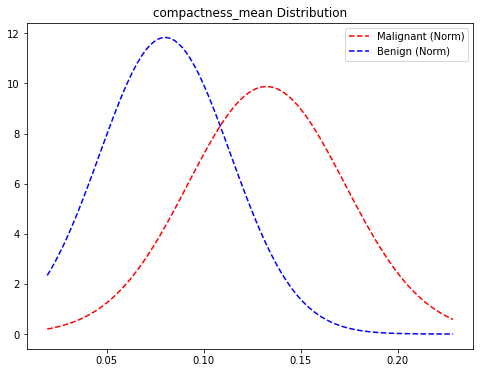

In [71]:
for feature in features:
    fig, ax = plt.subplots(figsize=(8, 6))

    mean_malignant, std_dev_malignant = norm.fit(malignant_data[feature])
    mean_benign, std_dev_benign = norm.fit(benign_data[feature])
    x = np.linspace(min(df[feature]), max(df[feature]), 100)

    ax.plot(x, norm.pdf(x, mean_malignant, std_dev_malignant), color='red', linestyle='--', label='Malignant (Norm)')
    ax.plot(x, norm.pdf(x, mean_benign, std_dev_benign), color='blue', linestyle='--', label='Benign (Norm)')

    plt.title(f'{feature} Distribution')
    plt.legend()

    plt.show()

# CODES FOR R CORRELATION COEFFICIENT

                        radius_mean  texture_mean  perimeter_mean  area_mean  \
radius_mean                1.000000      0.303788        0.991525   0.942860   
texture_mean               0.303788      1.000000        0.312120   0.314719   
perimeter_mean             0.991525      0.312120        1.000000   0.936514   
area_mean                  0.942860      0.314719        0.936514   1.000000   
smoothness_mean            0.138548      0.011262        0.177505   0.131873   
compactness_mean           0.428220      0.216861        0.479007   0.405132   
concavity_mean             0.633154      0.314019        0.674525   0.607138   
concave points_mean        0.751529      0.284644        0.789499   0.722908   
symmetry_mean              0.132041      0.110371        0.162164   0.137690   
fractal_dimension_mean    -0.297954     -0.056689       -0.249187  -0.277346   

                        smoothness_mean  compactness_mean  concavity_mean  \
radius_mean                    0.138548   

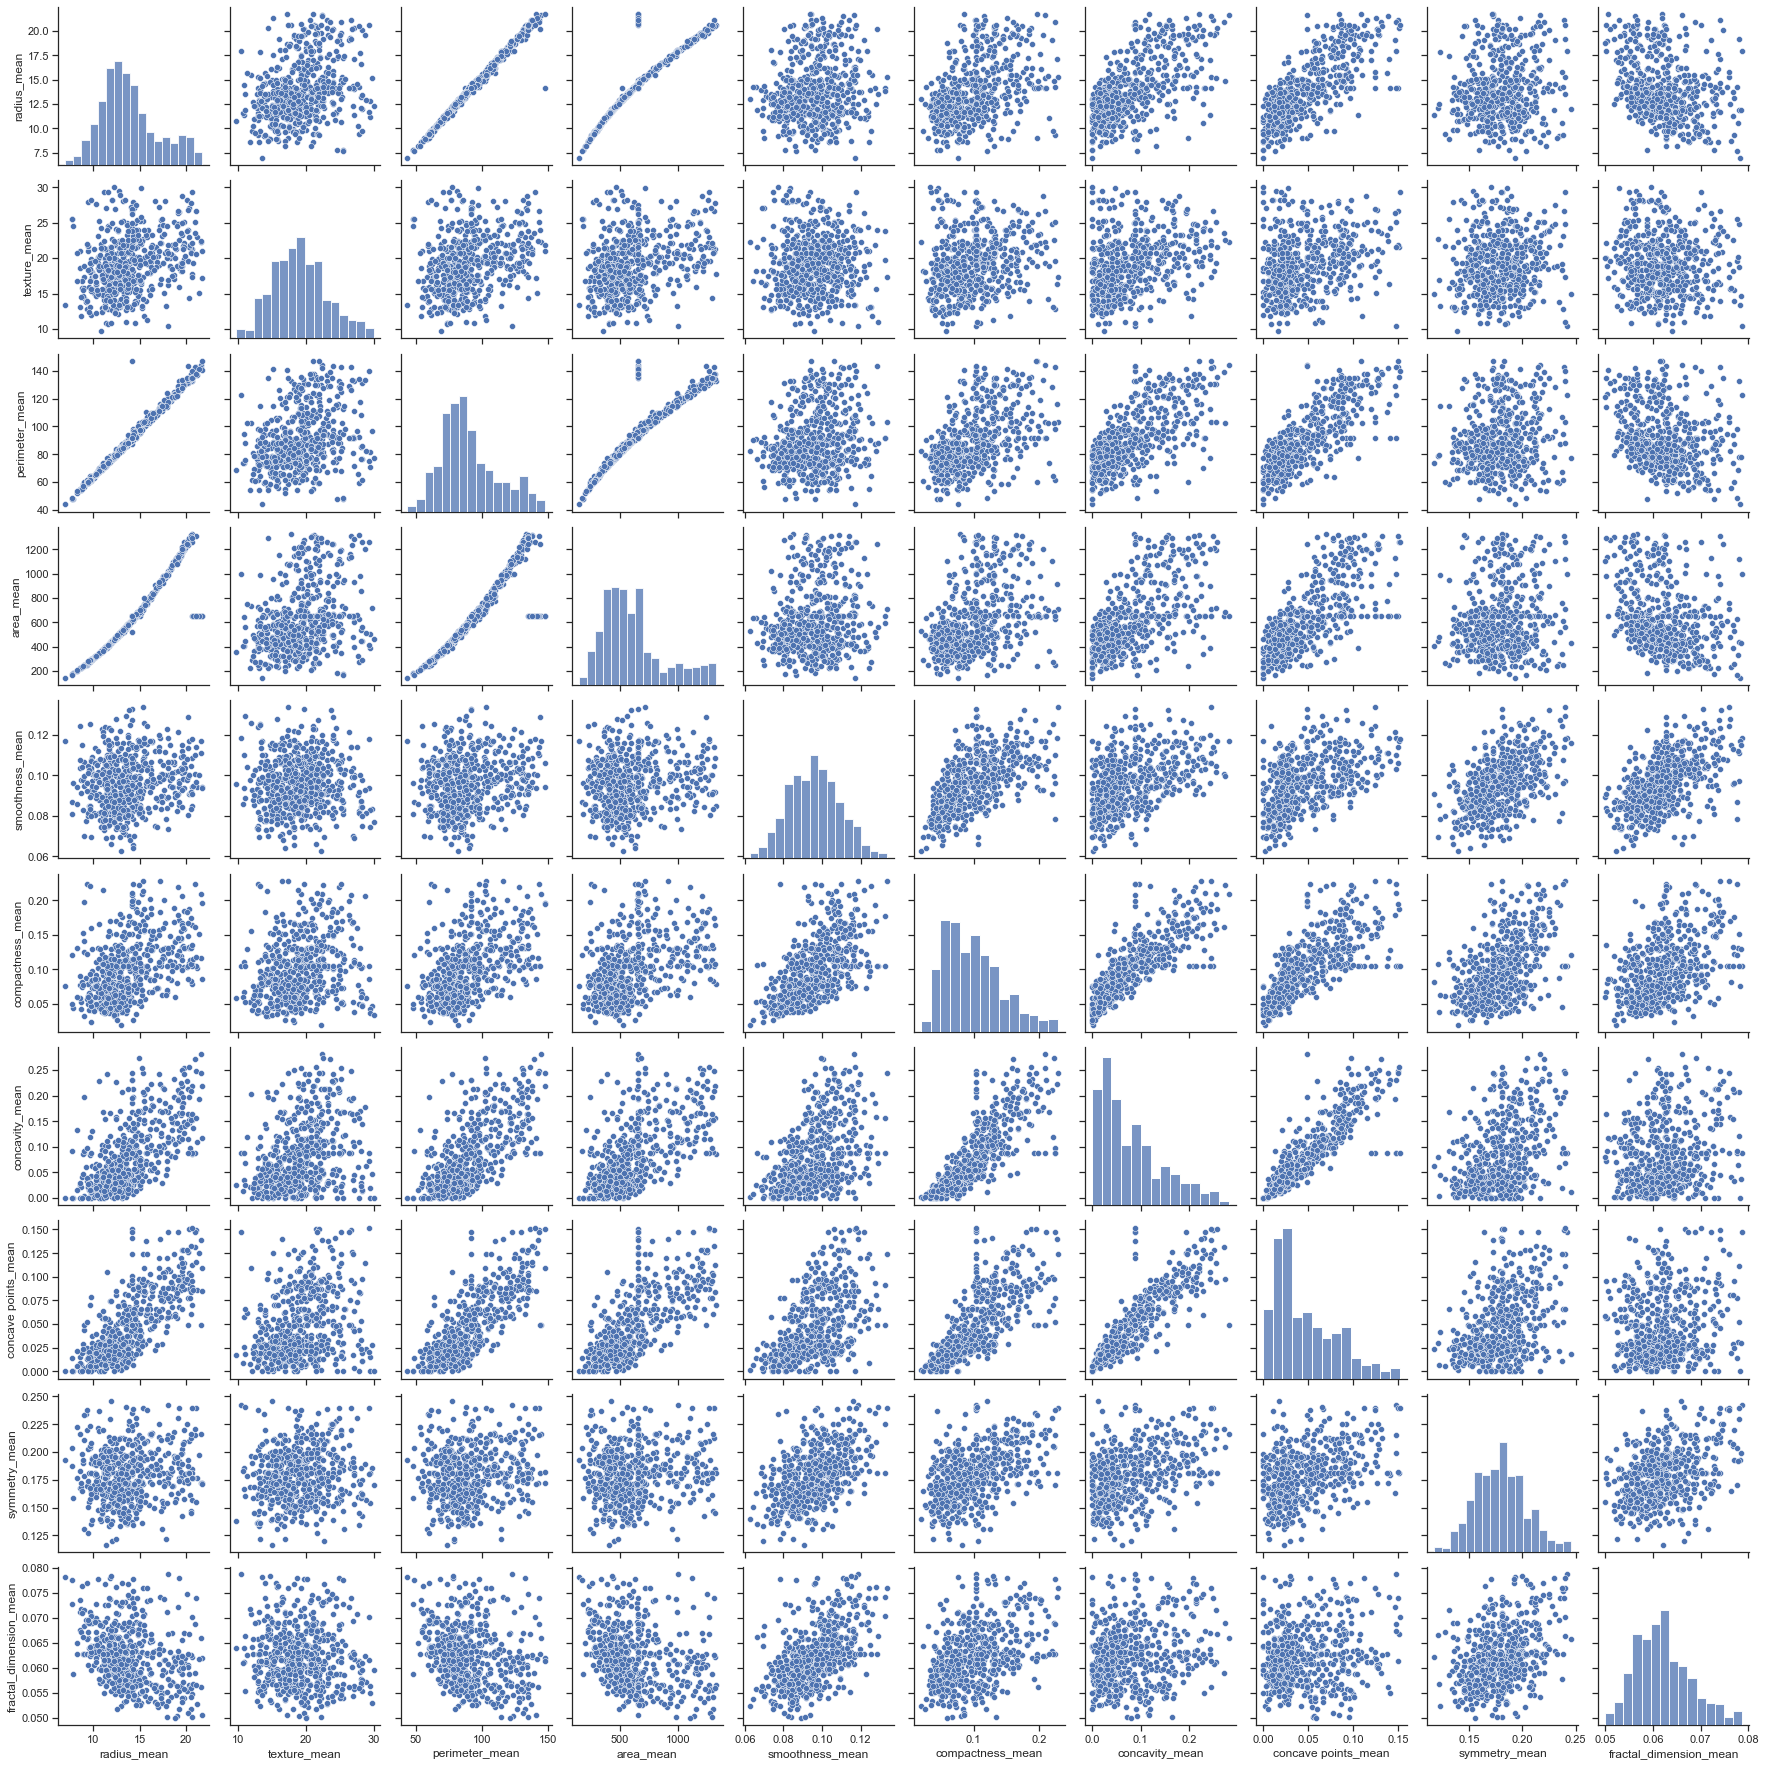

In [72]:
df_mean = df.loc[:, df.columns.str.contains('mean')]
correlation_matrix = df_mean.corr()
print(correlation_matrix)
sns.set(style="ticks")
sns.pairplot(df_mean)

# Show the plot
plt.show()

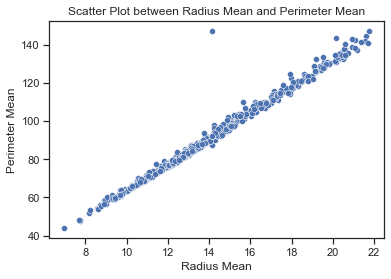

Pearson Correlation Coefficient (r): 0.9915


In [73]:
# Create a scatterplot between 'radius_mean' and 'perimeter_mean'
sns.scatterplot(data=df_mean, x='radius_mean', y='perimeter_mean')

# Set plot labels and title
plt.xlabel('Radius Mean')
plt.ylabel('Perimeter Mean')
plt.title('Scatter Plot between Radius Mean and Perimeter Mean')

# Show the plot
plt.show()

correlation_coefficient = df['radius_mean'].corr(df['perimeter_mean'])

# Print the correlation coefficient
print(f'Pearson Correlation Coefficient (r): {correlation_coefficient:.4f}')

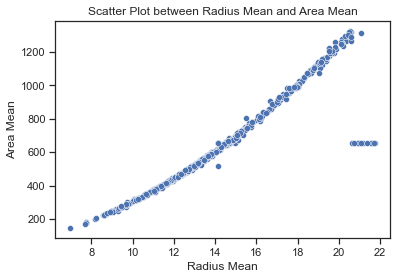

Pearson Correlation Coefficient (r): 0.9429


In [74]:
# Create a scatterplot between 'radius_mean' and 'perimeter_mean'
sns.scatterplot(data=df_mean, x='radius_mean', y='area_mean')

# Set plot labels and title
plt.xlabel('Radius Mean')
plt.ylabel('Area Mean')
plt.title('Scatter Plot between Radius Mean and Area Mean')

# Show the plot
plt.show()

correlation_coefficient = df['radius_mean'].corr(df['area_mean'])

# Print the correlation coefficient
print(f'Pearson Correlation Coefficient (r): {correlation_coefficient:.4f}')

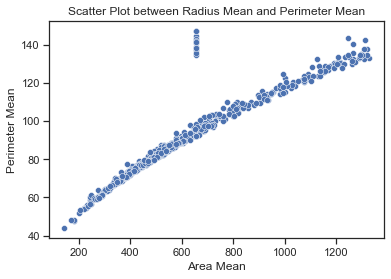

Pearson Correlation Coefficient (r): 0.9365


In [75]:
# Create a scatterplot between 'radius_mean' and 'perimeter_mean'
sns.scatterplot(data=df_mean, x='area_mean', y='perimeter_mean')

# Set plot labels and title
plt.xlabel('Area Mean')
plt.ylabel('Perimeter Mean')
plt.title('Scatter Plot between Radius Mean and Perimeter Mean')

# Show the plot
plt.show()

correlation_coefficient = df['area_mean'].corr(df['perimeter_mean'])

# Print the correlation coefficient
print(f'Pearson Correlation Coefficient (r): {correlation_coefficient:.4f}')

In [76]:
df = df.drop(['radius_mean','radius_se','perimeter_mean','perimeter_se'], axis=1)
df

,id,diagnosis,texture_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,texture_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se
0,8670,M,19.48,748.900000,0.10920,0.12230,0.146600,0.080870,0.1931,0.05796,0.7859,48.31,0.006240,0.01484,0.02813,0.010930,0.01397,0.002461
1,8913,B,13.12,515.900000,0.06955,0.03729,0.022600,0.011710,0.1337,0.05581,0.4690,12.68,0.004731,0.01345,0.01652,0.005905,0.01619,0.002081
2,8915,B,19.10,687.300000,0.08992,0.09823,0.059400,0.048190,0.1879,0.05852,0.9480,24.87,0.005332,0.02115,0.01536,0.011870,0.01522,0.002815
3,9047,B,16.17,507.600000,0.09879,0.08836,0.032960,0.023900,0.1735,0.06200,0.9050,11.36,0.002887,0.01285,0.01613,0.007308,0.01870,0.001972
4,85715,M,18.66,534.600000,0.11580,0.12310,0.122600,0.073400,0.2128,0.06777,0.8937,24.25,0.006532,0.02336,0.02905,0.012150,0.01743,0.003643
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,911157302,M,20.52,654.811796,0.09684,0.11750,0.157200,0.115500,0.1554,0.05661,1.3610,81.89,0.005467,0.02075,0.03185,0.014660,0.01029,0.002205
565,911296201,M,27.15,930.900000,0.09898,0.11100,0.100700,0.064310,0.1793,0.06281,1.1520,115.20,0.008740,0.02219,0.02721,0.014580,0.02045,0.004417
566,911296202,M,26.27,654.811796,0.10840,0.19880,0.088799,0.048953,0.2061,0.05623,1.3060,542.20,0.007650,0.05374,0.08055,0.025980,0.01697,0.004558
567,911320501,B,18.36,412.700000,0.08508,0.05855,0.033670,0.017770,0.1516,0.05859,0.7656,12.89,0.006709,0.01701,0.02080,0.007497,0.02124,0.002768


In [77]:
df = df.loc[:, ~df.columns.str.contains('se')]
df

# Convert the cleaned data to a CSV file
df.to_csv('Cleaned-Breast-cancer-mod.csv', index=False)
df = pd.read_csv('Cleaned-Breast-cancer-mod.csv')

In [78]:
#min-max normalization
mean_columns = [col for col in df.columns if 'mean' in col]

for column in mean_columns:
    min_val = df[column].min()
    max_val = df[column].max()
    df[column + '_norm'] = ((df[column] - min_val) / (max_val - min_val)) * (1 - 0) + 0

# Print the normalized DataFrame
print(df)
df.to_csv('Normalized-breast-cancer-mod.csv', index=False)

            id diagnosis  texture_mean   area_mean  smoothness_mean  \
0         8670         M         19.48  748.900000          0.10920   
1         8913         B         13.12  515.900000          0.06955   
2         8915         B         19.10  687.300000          0.08992   
3         9047         B         16.17  507.600000          0.09879   
4        85715         M         18.66  534.600000          0.11580   
..         ...       ...           ...         ...              ...   
564  911157302         M         20.52  654.811796          0.09684   
565  911296201         M         27.15  930.900000          0.09898   
566  911296202         M         26.27  654.811796          0.10840   
567  911320501         B         18.36  412.700000          0.08508   
568  911320502         B         18.22  537.300000          0.07466   

     compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0             0.12230        0.146600             0.080870         0.1

In [79]:
#Remove mean variables
df = df.drop(columns=mean_columns)
df

,id,diagnosis,texture_mean_norm,area_mean_norm,smoothness_mean_norm,compactness_mean_norm,concavity_mean_norm,concave points_mean_norm,symmetry_mean_norm,fractal_dimension_mean_norm
0,8670,M,0.482231,0.511966,0.657698,0.492393,0.521708,0.532039,0.591331,0.278261
1,8913,B,0.168312,0.314926,0.099169,0.085686,0.080427,0.077039,0.131579,0.203478
2,8915,B,0.463475,0.459873,0.386111,0.377237,0.211388,0.317039,0.551084,0.297739
3,9047,B,0.318855,0.307907,0.511058,0.330016,0.117295,0.157237,0.439628,0.418783
4,85715,M,0.441757,0.330740,0.750669,0.496220,0.436299,0.482895,0.743808,0.619478
...,...,...,...,...,...,...,...,...,...,...
564,911157302,M,0.533564,0.432399,0.483589,0.469429,0.559431,0.759868,0.299536,0.231304
565,911296201,M,0.860809,0.665877,0.513734,0.438331,0.358363,0.423092,0.484520,0.446957
566,911296202,M,0.817374,0.432399,0.646429,0.858387,0.316012,0.322061,0.691950,0.218087
567,911320501,B,0.426950,0.227653,0.317932,0.187398,0.119822,0.116908,0.270124,0.300174


In [80]:
#Random Sampling

np.random.seed(0)
test_size = 0.10

# Get the number of samples for the test set
num_test_samples = int(len(df) * test_size)

# Generate random indices for the test set
test_indices = np.random.choice(len(df), num_test_samples, replace=False)

# Create the test set by selecting rows using the indices
test_set = df.iloc[test_indices]

# Create the training set by excluding the test set
training_set = df.drop(test_indices)

test_set.to_csv('Test_Dataset.csv', index=False)
training_set.to_csv('Training_Dataset.csv', index=False)

In [3]:
data = pd.read_csv("Training_Dataset.csv")

# Checking dataframe dimensionality
print("The dimension of this dataset: ", data.shape, "\n")

# Checking format of dataframe
print(data.head())

The dimension of this dataset:  (513, 10) 

      id diagnosis  texture_mean_norm  area_mean_norm  smoothness_mean_norm  \
0   8670         M           0.482231        0.511966              0.657698   
1   8915         B           0.463475        0.459873              0.386111   
2   9047         B           0.318855        0.307907              0.511058   
3  85715         M           0.441757        0.330740              0.750669   
4  86208         M           0.657453        0.947569              0.398225   

   compactness_mean_norm  concavity_mean_norm  concave points_mean_norm  \
0               0.492393             0.521708                  0.532039   
1               0.377237             0.211388                  0.317039   
2               0.330016             0.117295                  0.157237   
3               0.496220             0.436299                  0.482895   
4               0.535451             0.521352                  0.571250   

   symmetry_mean_norm  fractal

In [4]:
from sklearn.metrics import f1_score, precision_score, recall_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc, accuracy_score, mean_squared_error, RocCurveDisplay
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,classification_report
from sklearn.metrics import precision_recall_fscore_support

In [5]:
main_influence_data = data[['texture_mean_norm', 'area_mean_norm', 'concavity_mean_norm', 'concave points_mean_norm', 'diagnosis']]

# Checking dataframe dimensionality
print("The dimension of this dataset: ", main_influence_data.shape, "\n")

# Checking format of dataframe
print(main_influence_data.head())

The dimension of this dataset:  (513, 5) 

   texture_mean_norm  area_mean_norm  concavity_mean_norm  \
0           0.482231        0.511966             0.521708   
1           0.463475        0.459873             0.211388   
2           0.318855        0.307907             0.117295   
3           0.441757        0.330740             0.436299   
4           0.657453        0.947569             0.521352   

   concave points_mean_norm diagnosis  
0                  0.532039         M  
1                  0.317039         B  
2                  0.157237         B  
3                  0.482895         M  
4                  0.571250         M  


## Exploratory Data Analysis (EDA) for main influence data

In [6]:
print("Type of variables: ", "\n", main_influence_data.dtypes)

Type of variables:  
 texture_mean_norm           float64
area_mean_norm              float64
concavity_mean_norm         float64
concave points_mean_norm    float64
diagnosis                    object
dtype: object


In [7]:
print(main_influence_data.describe())

       texture_mean_norm  area_mean_norm  concavity_mean_norm  \
count         513.000000      513.000000           513.000000   
mean            0.465485        0.393235             0.287729   
std             0.197194        0.226886             0.231938   
min             0.000000        0.000000             0.000000   
25%             0.319348        0.234080             0.105267   
50%             0.450148        0.336829             0.219039   
75%             0.586871        0.479577             0.415658   
max             1.000000        1.000000             1.000000   

       concave points_mean_norm  
count                513.000000  
mean                   0.306935  
std                    0.228638  
min                    0.000000  
25%                    0.133618  
50%                    0.219342  
75%                    0.452171  
max                    1.000000  


## Encode diagnosis with 1 or 0

In [8]:
main_influence_data = main_influence_data.copy()
main_influence_data['diagnosis'] = main_influence_data['diagnosis'].replace({'M': 1, 'B': 0})

In [9]:
# Checking for missing values in dataset
print(main_influence_data.isnull().sum())
print("===================================")
print(main_influence_data.isnull().any())

texture_mean_norm           0
area_mean_norm              0
concavity_mean_norm         0
concave points_mean_norm    0
diagnosis                   0
dtype: int64
texture_mean_norm           False
area_mean_norm              False
concavity_mean_norm         False
concave points_mean_norm    False
diagnosis                   False
dtype: bool


## Data Preprocessing

In [10]:
col_list = main_influence_data.columns
target_list = ['diagnosis']
feature_list = [i for i in col_list if i not in ['diagnosis']]

X = main_influence_data[feature_list].values
y = main_influence_data[target_list].values.ravel()

In [11]:
# Split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train = X_train
X_test = X_test
y_train = y_train
y_test = y_test
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(359, 4) (154, 4) (359,) (154,)


In [12]:
from collections import Counter
print(Counter(y_train))

Counter({0: 224, 1: 135})


In [13]:
# Make sure that the target list class are balance, to prevent class imbalance issues
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_train, y_train = sm.fit_resample(X_train,y_train.ravel())

Counter(y_train)

Counter({1: 224, 0: 224})

## Machine Learning Models

In [14]:
def evaluation(y_test, y_pred, y_pred_prob):
    # Input:
    # y_test: Ground Truth labels
    # y_pred: Predicted labels
    # y_pred_prob: Predicted probability
    print('==========')

    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)

    # Calculate confusion matrix
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

    display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
    display.plot()
    plt.show()

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Calculate specificity and sensitivity
    specificity = tn / (tn + fp)
    sensitivity = tp / (tp + fn)

    print("Accuracy:\t{}\nPrecision:\t{}\nRecall:\t{}\nF1:\t{}\nSpecificity:\t{}\nSensitivity:\t{}\nAUC:\t{}"
          .format(accuracy, precision, recall, f1, specificity, sensitivity, roc_auc))

## Logistic Regression

In [15]:
from sklearn.linear_model import LogisticRegression

In [16]:
# Logistic Regression
model_setup={'fit_intercept': True, 'random_state': 42,
             'max_iter':10000, 'solver': 'lbfgs', 'penalty': None}

In [17]:
clf0 = LogisticRegression(**model_setup).fit(X_train, y_train)
y_pred0 = clf0.predict(X_test)
y_pred_train0 = clf0.predict(X_train)
y_pred_prob0 = clf0.predict_proba(X_test)[:, 1]

tn, fp, fn, tp = confusion_matrix(y_test, y_pred0).ravel()
confusion = confusion_matrix(y_test, y_pred0)
print(f"Number of True Negative: {tn}")
print(f"Number of False Positive: {fp}")
print(f"Number of False Negative: {fn}")
print(f"Number of True Positive: {tp}")
print(confusion)
print("---------")

print("Training Accuracy: {:10.9f}, Testing Accuracy: {:10.9f}".format(accuracy_score(y_train, y_pred_train0),
                                    accuracy_score(y_test, y_pred0)))

Number of True Negative: 94
Number of False Positive: 4
Number of False Negative: 5
Number of True Positive: 51
[[94  4]
 [ 5 51]]
---------
Training Accuracy: 0.924107143, Testing Accuracy: 0.941558442


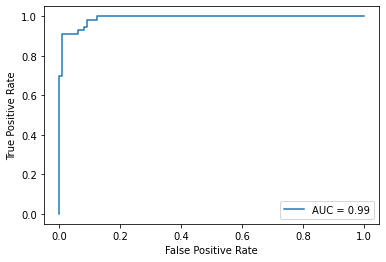

Accuracy:	0.9415584415584416
Precision:	0.9272727272727272
Recall:	0.9107142857142857
F1:	0.918918918918919
Specificity:	0.9591836734693877
Sensitivity:	0.9107142857142857
AUC:	0.9897959183673469


In [18]:
evaluation(y_test, y_pred0, y_pred_prob0)

Number of Features: 4


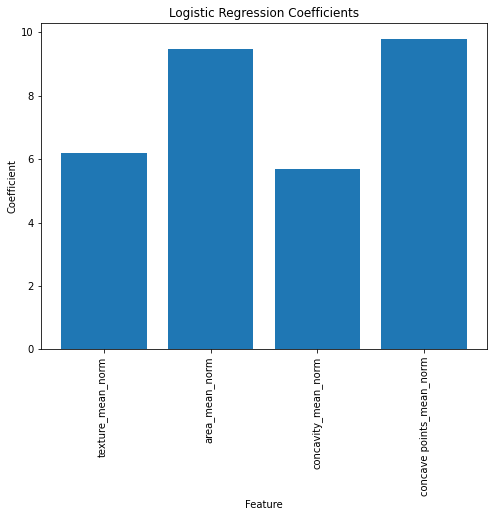

In [19]:
coef = clf0.coef_.ravel()
feature_names = feature_list

print("Number of Features:", len(feature_names))
# Plot the coefficients with feature names
plt.figure(figsize=(8, 6))
plt.bar(feature_names, coef)
plt.xticks(rotation=90)
plt.xlabel("Feature")
plt.ylabel("Coefficient")
plt.title("Logistic Regression Coefficients")
plt.show()

## Naive Bayes

In [20]:
from sklearn.naive_bayes import GaussianNB

In [21]:
clf_nb = GaussianNB()

clf_nb.fit(X_train, y_train)

y_pred_nb = clf_nb.predict(X_test)
y_pred_nb_train = clf_nb.predict(X_train)
y_pred_nb_prob = clf_nb.predict_proba(X_test)[:, 1]

tn, fp, fn, tp = confusion_matrix(y_test, y_pred_nb).ravel()
confusion = confusion_matrix(y_test, y_pred_nb)
print(f"Number of True Negative: {tn}")
print(f"Number of False Positive: {fp}")
print(f"Number of False Negative: {fn}")
print(f"Number of True Positive: {tp}")
print(confusion)
print("---------")
print("Training Accuracy: {:10.9f}, Testing Accuracy: {:10.9f}".format(accuracy_score(y_train, y_pred_nb_train),
                                    accuracy_score(y_test, y_pred_nb)))

Number of True Negative: 93
Number of False Positive: 5
Number of False Negative: 8
Number of True Positive: 48
[[93  5]
 [ 8 48]]
---------
Training Accuracy: 0.915178571, Testing Accuracy: 0.915584416


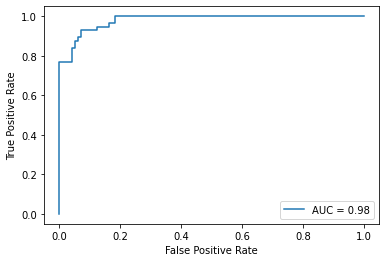

Accuracy:	0.9155844155844156
Precision:	0.9056603773584906
Recall:	0.8571428571428571
F1:	0.8807339449541285
Specificity:	0.9489795918367347
Sensitivity:	0.8571428571428571
AUC:	0.9799562682215743


In [22]:
evaluation(y_test, y_pred_nb, y_pred_nb_prob)

## Decision Tree Algorithm

In [23]:
from sklearn.tree import DecisionTreeClassifier

In [24]:
clf_dt = DecisionTreeClassifier(random_state=42).fit(X_train, y_train)
y_pred_dt = clf_dt.predict(X_test)
y_pred_dt_train = clf_dt.predict(X_train)
y_pred_dt_prob = clf_dt.predict_proba(X_test)[:,1]

tn, fp, fn, tp = confusion_matrix(y_test, y_pred_dt).ravel()
confusion = confusion_matrix(y_test, y_pred_dt)
print(f"Number of True Negative: {tn}")
print(f"Number of False Positive: {fp}")
print(f"Number of False Negative: {fn}")
print(f"Number of True Positive: {tp}")
print(confusion)
print("---------")
print("Training Accuracy: {:10.9f}, Testing Accuracy: {:10.9f}".format(accuracy_score(y_train, y_pred_dt_train),
                                    accuracy_score(y_test, y_pred_dt)))

Number of True Negative: 92
Number of False Positive: 6
Number of False Negative: 5
Number of True Positive: 51
[[92  6]
 [ 5 51]]
---------
Training Accuracy: 1.000000000, Testing Accuracy: 0.928571429


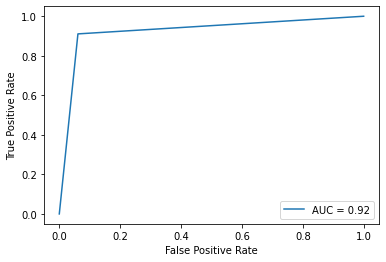

Accuracy:	0.9285714285714286
Precision:	0.8947368421052632
Recall:	0.9107142857142857
F1:	0.9026548672566371
Specificity:	0.9387755102040817
Sensitivity:	0.9107142857142857
AUC:	0.9247448979591837


In [25]:
evaluation(y_test, y_pred_dt, y_pred_dt_prob)

## Support Vector Machine

In [26]:
from sklearn.svm import SVC

In [27]:
svm_classifier = SVC(kernel='linear', C=1.0, random_state=42, probability=True)

svm_classifier.fit(X_train, y_train)
y_pred_svm = svm_classifier.predict(X_test)
y_pred_svm_train = svm_classifier.predict(X_train)
y_pred_svm_prob = svm_classifier.predict_proba(X_test)[:, 1]

tn, fp, fn, tp = confusion_matrix(y_test, y_pred_svm).ravel()
confusion = confusion_matrix(y_test, y_pred_svm)
print(f"Number of True Negative: {tn}")
print(f"Number of False Positive: {fp}")
print(f"Number of False Negative: {fn}")
print(f"Number of True Positive: {tp}")
print(confusion)
print("---------")
print("Training Accuracy: {:10.9f}, Testing Accuracy: {:10.9f}".format(accuracy_score(y_train, y_pred_svm_train),
                                    accuracy_score(y_test, y_pred_svm)))


Number of True Negative: 96
Number of False Positive: 2
Number of False Negative: 6
Number of True Positive: 50
[[96  2]
 [ 6 50]]
---------
Training Accuracy: 0.926339286, Testing Accuracy: 0.948051948


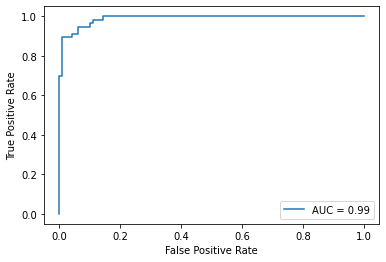

Accuracy:	0.948051948051948
Precision:	0.9615384615384616
Recall:	0.8928571428571429
F1:	0.9259259259259259
Specificity:	0.9795918367346939
Sensitivity:	0.8928571428571429
AUC:	0.9887026239067056


In [28]:
evaluation(y_test, y_pred_svm, y_pred_svm_prob)

## NNet Neural Network

In [32]:
from tensorflow import keras
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [33]:
# Create a neural network classifier (Sequential model)
nn_classifier = keras.Sequential([
    Dense(128, activation='relu', input_shape=(4,)),  # Fully connected layer with 128 units and ReLU activation
    Dropout(0.2),  # Dropout layer with a 20% dropout rate
    Dense(1, activation='sigmoid')  # Output layer with 1 unit for binary classification (sigmoid activation)
])

# Compile the model
nn_classifier.compile(
    optimizer=Adam(learning_rate=0.001),  # Adam optimizer with a specified learning rate
    loss='binary_crossentropy',  # Loss function for binary classification
    metrics=['accuracy']  # Evaluation metric
)

# Train the model on the training data
nn_classifier.fit(X_train, y_train, epochs=5)

# Make predictions on the test set
y_pred_nn = nn_classifier.predict(X_test)
y_pred_nn = [1 if y > 0.5 else 0 for y in y_pred_nn]  # Convert probabilities to binary class labels
y_pred_nn_train = nn_classifier.predict(X_train)
y_pred_nn_train = [1 if y > 0.5 else 0 for y in y_pred_nn_train]  # Convert probabilities to binary class labels

tn, fp, fn, tp = confusion_matrix(y_test, y_pred_nn).ravel()
confusion = confusion_matrix(y_test, y_pred_nn)
print(f"Number of True Negative: {tn}")
print(f"Number of False Positive: {fp}")
print(f"Number of False Negative: {fn}")
print(f"Number of True Positive: {tp}")
print(confusion)
print("---------")
print("Training Accuracy: {:10.9f}, Testing Accuracy: {:10.9f}".format(accuracy_score(y_train, y_pred_nn_train),
                                    accuracy_score(y_test, y_pred_nn)))


Epoch 1/5
14/14 [==============================] - 0s 2ms/step - loss: 0.6782 - accuracy: 0.4799
Epoch 2/5
14/14 [==============================] - 0s 2ms/step - loss: 0.6401 - accuracy: 0.5179
Epoch 3/5
14/14 [==============================] - 0s 2ms/step - loss: 0.6113 - accuracy: 0.5960
Epoch 4/5
14/14 [==============================] - 0s 2ms/step - loss: 0.5800 - accuracy: 0.6897
Epoch 5/5
14/14 [==============================] - 0s 1ms/step
Number of True Negative: 70
Number of False Positive: 28
Number of False Negative: 2
Number of True Positive: 54
[[70 28]
 [ 2 54]]
---------
Training Accuracy: 0.812500000, Testing Accuracy: 0.805194805


5/5 [==============================] - 0s 1ms/step


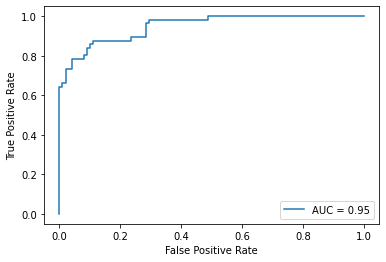

Accuracy:	0.8051948051948052
Precision:	0.6585365853658537
Recall:	0.9642857142857143
F1:	0.782608695652174
Specificity:	0.7142857142857143
Sensitivity:	0.9642857142857143
AUC:	0.9489795918367347


In [34]:
evaluation(y_test, y_pred_nn, nn_classifier.predict(X_test))

## KNN Classification

In [35]:
from sklearn.neighbors import KNeighborsClassifier

In [36]:
from sklearn.model_selection import GridSearchCV

# Define the range of hyperparameters to search over
param_grid = {
    'n_neighbors':  range(1, 50),
    'weights': ['uniform', 'distance']
}

# Create the K-nearest neighbors classification model
knn = KNeighborsClassifier()

# Create the grid search object
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')

# Fit the grid search object to the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and corresponding accuracy score
print("Best hyperparameters: ", grid_search.best_params_)
print("Best accuracy score: ", grid_search.best_score_)

# Evaluate the best model on the test data
best_knn = grid_search.best_estimator_
test_acc = best_knn.score(X_test, y_test)
print("Accuracy for test data: ", test_acc)

Best hyperparameters:  {'n_neighbors': 5, 'weights': 'distance'}
Best accuracy score:  0.9509113607990013
Accuracy for test data:  0.935064935064935


In [37]:
knn = KNeighborsClassifier(n_neighbors=5)
clf_knn = knn.fit(X_train, y_train)
y_pred_knn = clf_knn.predict(X_test)
y_pred_train_knn = clf_knn.predict(X_train)
y_pred_prob_knn = clf_knn.predict_proba(X_test)[:, 1]

tn, fp, fn, tp = confusion_matrix(y_test, y_pred_knn).ravel()
confusion = confusion_matrix(y_test, y_pred_knn)
print(f"Number of True Negative: {tn}")
print(f"Number of False Positive: {fp}")
print(f"Number of False Negative: {fn}")
print(f"Number of True Positive: {tp}")
print(confusion)
print("---------")

print("Training Accuracy: {:10.9f}, Testing Accuracy: {:10.9f}".format(accuracy_score(y_train, y_pred_train_knn),
                                    accuracy_score(y_test, y_pred_knn)))

Number of True Negative: 92
Number of False Positive: 6
Number of False Negative: 5
Number of True Positive: 51
[[92  6]
 [ 5 51]]
---------
Training Accuracy: 0.959821429, Testing Accuracy: 0.928571429


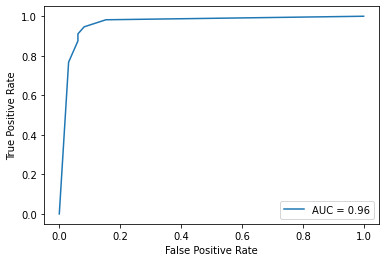

Accuracy:	0.9285714285714286
Precision:	0.8947368421052632
Recall:	0.9107142857142857
F1:	0.9026548672566371
Specificity:	0.9387755102040817
Sensitivity:	0.9107142857142857
AUC:	0.9641034985422741


In [38]:
evaluation(y_test, y_pred_knn, y_pred_prob_knn)

## Random Forest

In [39]:
from sklearn.ensemble import RandomForestClassifier

In [42]:
rf = RandomForestClassifier(n_estimators=100)
clf_rf = rf.fit(X_train, y_train)
y_pred_rf = clf_rf.predict(X_test)
y_pred_train_rf = clf_rf.predict(X_train)
y_pred_prob_rf = clf_rf.predict_proba(X_test)[:, 1]

tn, fp, fn, tp = confusion_matrix(y_test, y_pred_rf).ravel()
confusion = confusion_matrix(y_test, y_pred_rf)
print(f"Number of True Negative: {tn}")
print(f"Number of False Positive: {fp}")
print(f"Number of False Negative: {fn}")
print(f"Number of True Positive: {tp}")
print(confusion)
print("---------")

print("Training Accuracy: {:10.9f}, Testing Accuracy: {:10.9f}".format(accuracy_score(y_train, y_pred_train_rf),
                                    accuracy_score(y_test, y_pred_rf)))

Number of True Negative: 97
Number of False Positive: 1
Number of False Negative: 5
Number of True Positive: 51
[[97  1]
 [ 5 51]]
---------
Training Accuracy: 1.000000000, Testing Accuracy: 0.961038961


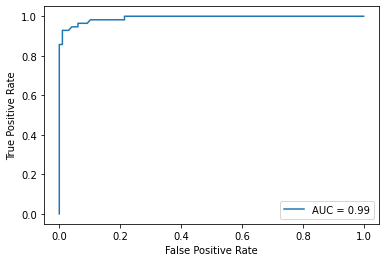

Accuracy:	0.961038961038961
Precision:	0.9807692307692307
Recall:	0.9107142857142857
F1:	0.9444444444444444
Specificity:	0.9897959183673469
Sensitivity:	0.9107142857142857
AUC:	0.9919825072886298


In [43]:
evaluation(y_test, y_pred_rf, y_pred_prob_rf)